To retrieve the datas please search here: 
https://data.wprdc.org/dataset/police-incident-blotter
https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/82f29015-6905-4b1c-8300-afe9bb2231b3
https://data.wprdc.org/dataset/1984-community-profiles-a-descriptive-picture-of-communities-in-allegheny-county/resource/8e2b239e-4a46-49f9-bd13-2566f3c64d28

## Crime in Pittsburgh

One of the main determining factor when thinking the best neighborhood is to safety. Having a safe location is important for families as a mean to protect their children as much as possible from these people:

![alt text](https://media.giphy.com/media/8EQnmihngXilq/giphy.gif)

## Most Amount of Cases

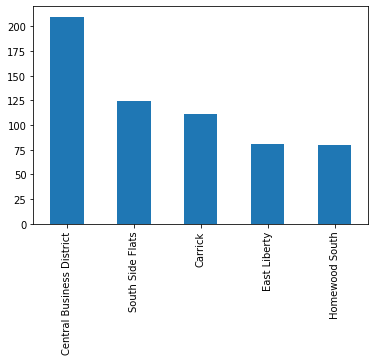

In [1]:
import pandas as pd
import numpy as np
#this reads in the crime data from october to early november
bacon= pd.read_csv("Coconut.csv")
#this counts the amount of time a place has an incident
cheese=bacon['INCIDENTNEIGHBORHOOD'].value_counts()
#this orders the neighborhood from most to least amount of crime
cheese.sort_values(ascending=False)
#plot of the bar graph for most crime
cheese.head().plot(kind='bar')

## Least Amount of cases

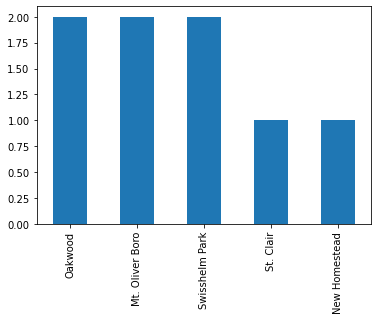

In [2]:
#plot of the bar graph for least crime
cheese.tail().plot(kind='bar')

## An Overview on the map

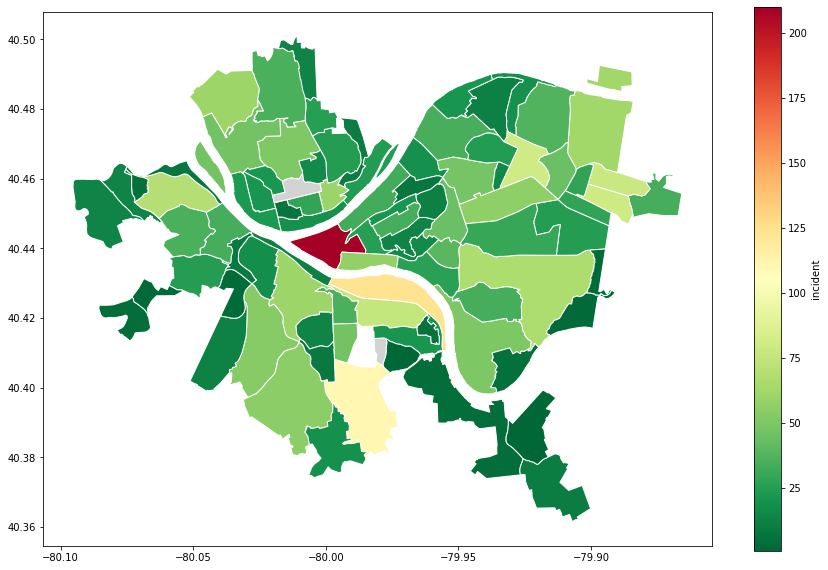

In [3]:
import geopandas
%matplotlib inline
#each incident is one event 
bacon['incident']=1
#this shows the amount of crimes that occured in each incident
hmm=bacon.groupby('INCIDENTNEIGHBORHOOD').sum()
#this plot the graph 
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
crime_map = neighborhoods.merge(hmm, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
crime_map.plot(column='incident', cmap='RdYlGn_r', edgecolor="white", legend=True, 
               legend_kwds={'label':"incident"},figsize=(15, 10), missing_kwds={"color": "lightgrey"} )


## However that doesn't account for the population of the nieghborhood

While the amount of crimes that occurs in the area does determine one's decision of moving in an area. However, these datas didn't account for the population in the area.

In [4]:
#this shows the chart of the population
pop2017 = pd.read_csv("2017pop.csv") 
pop2017.head(15)

,Neighborhood,Id,Estimate; Total,Margin of Error; Total
0,Allegheny Center,1,1411,196.000000
1,Allegheny West,2,343,96.000000
2,Allentown,3,2558,449.773276
3,Arlington,4,1852,348.188168
4,Arlington Heights,5,272,126.000000
5,Banksville,6,3858,581.107563
6,Bedford Dwellings,7,1349,180.000000
7,Beechview,8,8078,719.658252
8,Beltzhoover,9,1702,343.072879
9,Bloomfield,10,8669,491.348145


                 Neighborhood  crime_population
21                    Chateau          0.130435
71                South Shore          1.000000
57                North Shore         10.789474
16  Central Business District         19.333333
80             Strip District         22.636364
87                   West End         26.111111
41             Homewood South         28.450000
42              Homewood West         30.357143
25             East Allegheny         34.916667
44                    Larimer         36.466667
14       California-Kirkbride         36.500000
30                     Esplen         38.625000
40             Homewood North         43.217949
4           Arlington Heights         45.333333
0            Allegheny Center         48.655172
1              Allegheny West         49.000000
72           South Side Flats         50.741935
50                Middle Hill         51.764706
58          Northview Heights         59.423077
73          South Side Slopes         60

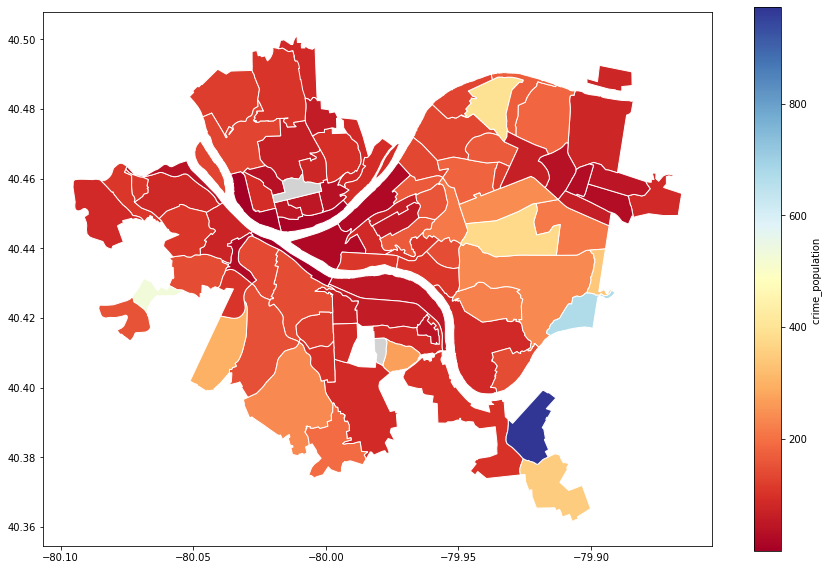

In [6]:
pop2017 = pd.read_csv("2017pop.csv") 
#this merge the two charts and fine the population to crime ratio
crime_map2 = pop2017.merge(hmm, how='left', left_on='Neighborhood', right_on='INCIDENTNEIGHBORHOOD')
crime_map2['crime_population']=(crime_map2['Estimate; Total']/(crime_map2['incident']))
#this shows the data where crimes is the msot prevalent.
crime_map2 =crime_map2.sort_values('crime_population',ascending=True)
print(crime_map2.loc[:,['Neighborhood','crime_population']].head(20))
#this prints a map that shows the crime rate based off of population to crime ratio on the map
stuff = neighborhoods.merge(crime_map2, how='left', left_on='hood', right_on='Neighborhood')
stuff.plot(column='crime_population', cmap='RdYlBu', edgecolor="white", legend=True, 
    legend_kwds={'label':"crime_population "},figsize=(15, 10), missing_kwds={"color": "lightgrey"} )

As you can see even then places like city middle is the worst place
Here are the data where crime ratio is the least

In [8]:
print(crime_map2.loc[:,['Neighborhood','crime_population']].tail(15))

            Neighborhood  crime_population
13             Brookline        239.272727
77   Squirrel Hill South        239.432836
68             Shadyside        242.178571
78             St. Clair        270.000000
5             Banksville        296.769231
66         Regent Square        344.333333
45         Lincoln Place        349.900000
76   Squirrel Hill North        377.866667
79       Stanton Heights        396.750000
59               Oakwood        529.000000
82        Swisshelm Park        672.500000
55         New Homestead        973.000000
18     Central Northside               NaN
52  Mount Oliver Borough               NaN
54            Mt. Oliver               NaN


## Conclusion

## Top 5 place based off of Population to crime data

1. New Homestead 
2. Swisshelm Park 
3. Oakwood
4. Stanton Height 
5. Squirrel Hill North

If one consider the crime rate in the area, it is easy to tell why people might move into these area than other area as it provides more safety for their children, which caused places like squirrel hill north to have expensive housing. However, crime doesn't tell the whole story in an area. Some other factors may impacts a person decision from selecting one place over another include education, opportunites, and the pollution within that location. Although places like Central Business District has a decent amount of crime, the job opportunities in the area from large companies cause the housing price in the area to be more than these lower crime rate area.